#**Heart Attack Analysis and Prediction**



#### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

####**Loading the Dataset**

In [2]:
df=pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,48,1,2,139,349,0,2,183,1,5.6,2,2,3,1
1299,47,1,3,143,258,1,1,98,1,5.7,1,0,3,0
1300,69,1,0,156,434,1,0,196,0,1.4,3,1,3,1
1301,45,1,1,186,417,0,1,117,1,5.9,3,2,2,1


####**Initial analysis on the dataset**

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns=["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [5]:
df.columns=new_columns

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (1303, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1303 non-null   int64  
 1   sex       1303 non-null   int64  
 2   cp        1303 non-null   int64  
 3   trtbps    1303 non-null   int64  
 4   chol      1303 non-null   int64  
 5   fbs       1303 non-null   int64  
 6   rest_ecg  1303 non-null   int64  
 7   thalach   1303 non-null   int64  
 8   exang     1303 non-null   int64  
 9   oldpeak   1303 non-null   float64
 10  slope     1303 non-null   int64  
 11  ca        1303 non-null   int64  
 12  thal      1303 non-null   int64  
 13  target    1303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 142.6 KB


####**Preparation for Exploratory Data Analysis(EDA)**

In [9]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
isnull_number=[]
for i in df.columns:
  x=df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

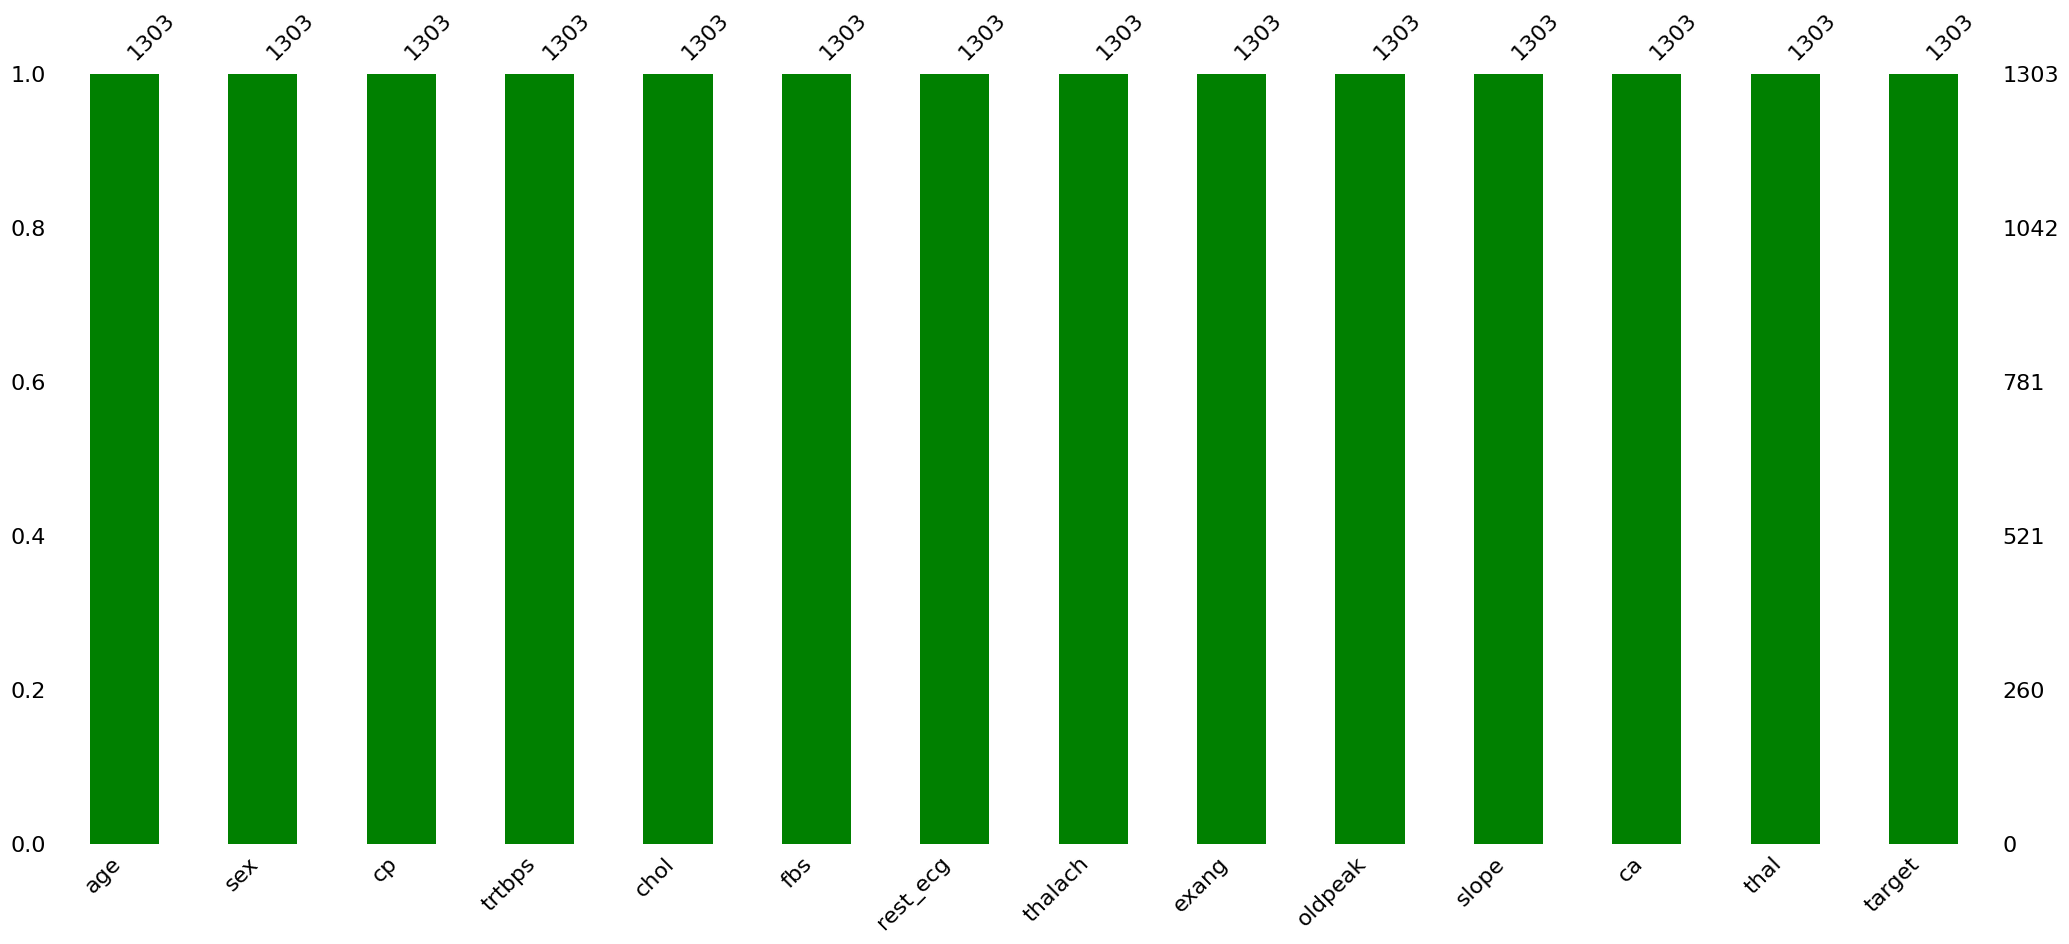

In [12]:
import missingno
missingno.bar(df,color="green")

In [13]:
df["cp"].value_counts()

0    563
2    399
1    274
3     67
Name: cp, dtype: int64

In [14]:
df["cp"].value_counts().sum()

1303

In [15]:
df["cp"].value_counts().count()

4

In [16]:
unique_number=[]
for i in df.columns:
  x=df[i].value_counts().count()
  unique_number.append(x)

pd.DataFrame(unique_number,index=df.columns,columns=["Total Unique Values"])

,Total Unique Values
age,61
sex,2
cp,4
trtbps,101
chol,369
fbs,2
rest_ecg,3
thalach,130
exang,2
oldpeak,63


#####**Separating variables (Numeric or Categorical)**

In [17]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak"]
categoric_var =["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

######**Examining Statistics of Variables**

In [19]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,50.433615,141.823484,307.993093,146.446662,2.319800
std,16.392039,24.817667,106.905434,31.964507,1.755441
min,20.000000,94.000000,85.000000,71.000000,0.000000
25%,38.000000,126.000000,231.500000,124.000000,0.800000
50%,52.000000,138.000000,288.000000,149.000000,2.000000
75%,63.000000,157.000000,367.000000,172.000000,3.600000
max,80.000000,199.000000,602.000000,202.000000,6.200000


Note: Different graphics were used in the analysis to develop visualization skills.

<Axes: xlabel='age', ylabel='Density'>

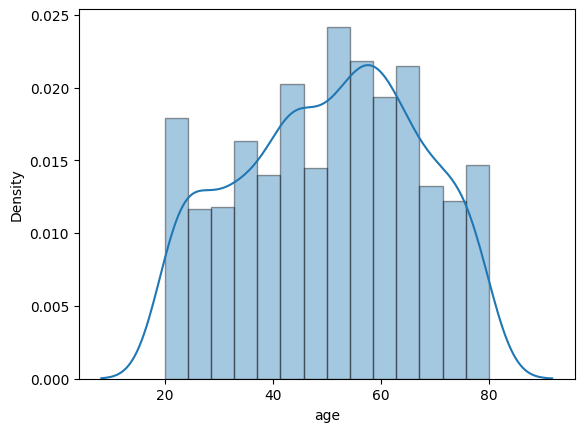

In [20]:
sns.distplot(df["age"],hist_kws=dict(linewidth=1,edgecolor="k"))

<Axes: xlabel='trtbps', ylabel='Density'>

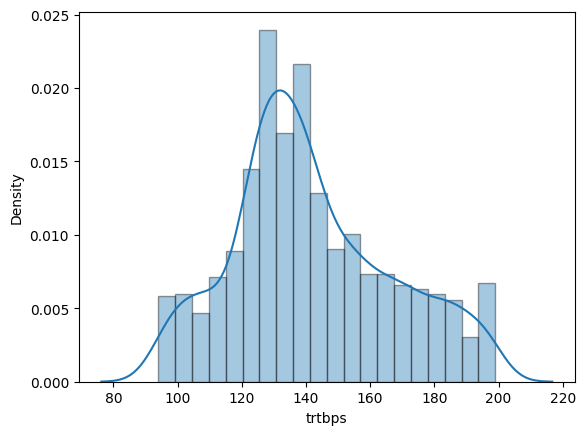

In [21]:
sns.distplot(df["trtbps"],hist_kws=dict(linewidth=1,edgecolor="k"),bins=20)

<Axes: xlabel='chol', ylabel='Density'>

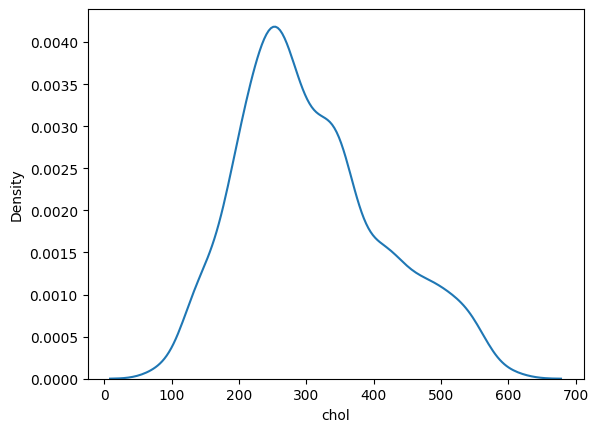

In [22]:
sns.distplot(df["chol"],hist=False)

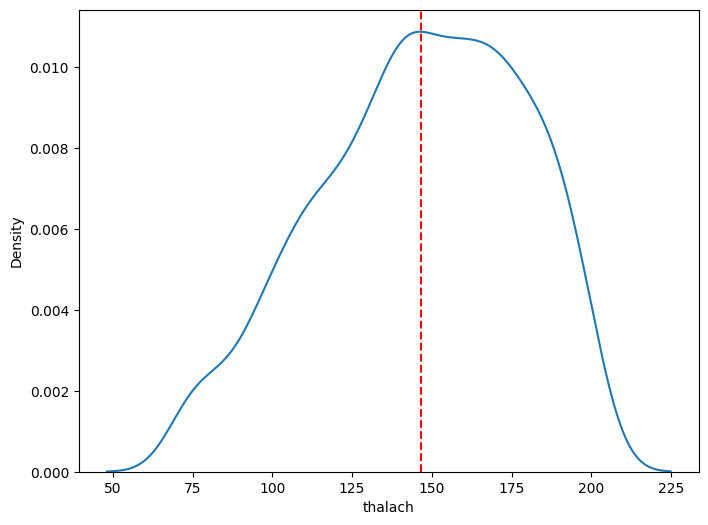

In [23]:
x,y=plt.subplots(figsize=(8,6))
sns.distplot(df["thalach"],hist=False,ax=y)
y.axvline(df["thalach"].mean(),color="r",ls="--")

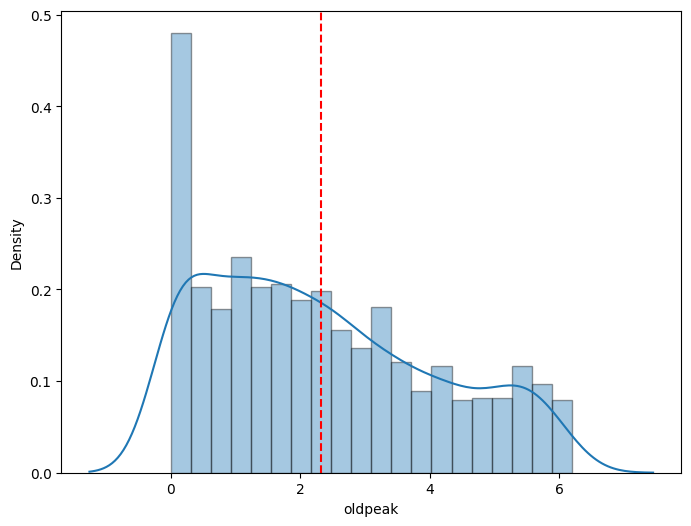

In [24]:
x,y=plt.subplots(figsize=(8,6))
sns.distplot(df["oldpeak"],hist_kws=dict(linewidth=1,edgecolor="k"),bins=20,ax=y)
y.axvline(df["oldpeak"].mean(),color="r",ls="--")

####**Exploratory Data Analysis(EDA)**

#####**Uni-variate Analysis**

######**Numerical Variables(Analysis with Distplot)**

In [25]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [26]:
numeric_axis_name=["Age of the Patient","Resting Blood Pressure","Cholesterol","Maximum Heart Rate Achieved","ST Depression"]

In [27]:
list(zip(numeric_var,numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

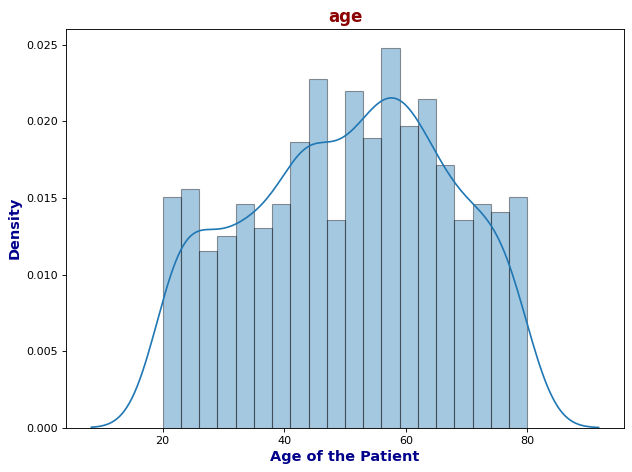

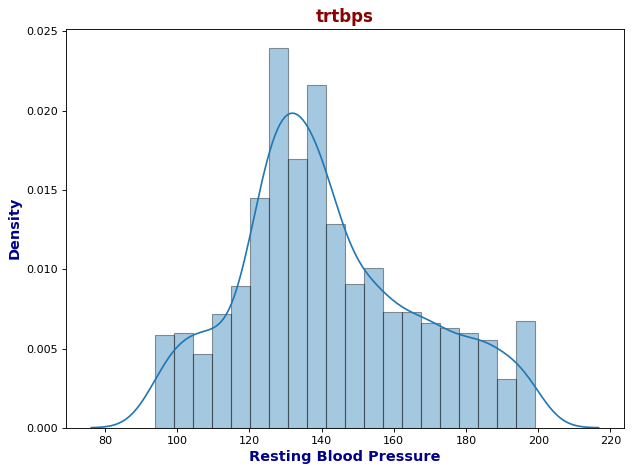

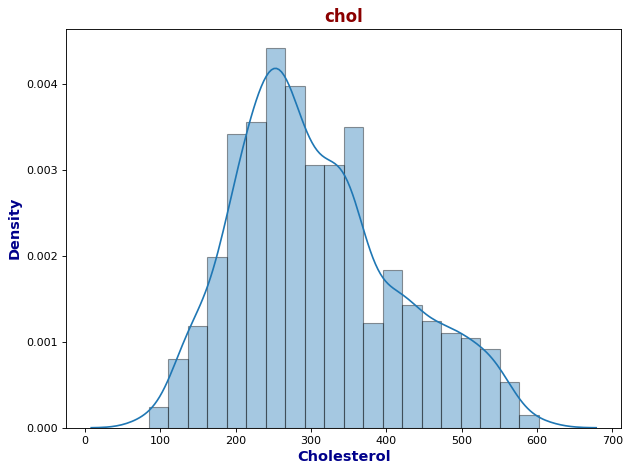

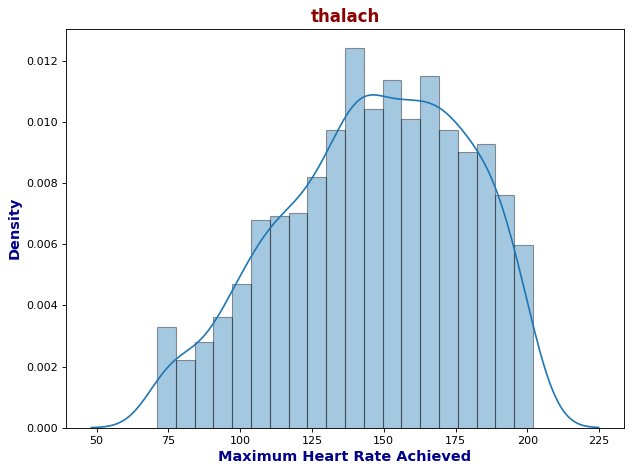

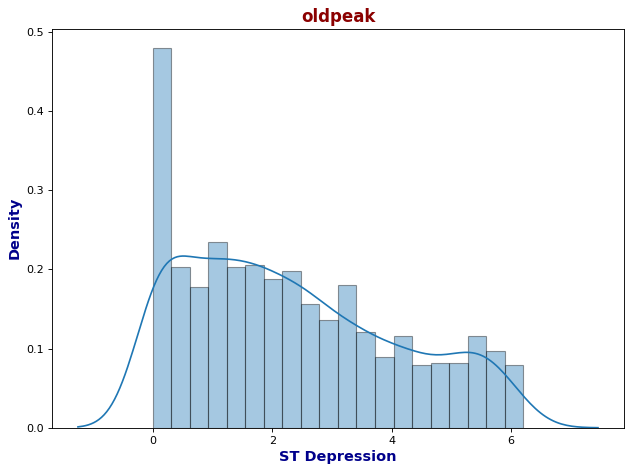

In [28]:
title_font={"color":"darkred","weight":"bold","size":15}
axis_font={"color":"darkblue","weight":"bold","size":13}

for i ,z in list(zip(numeric_var,numeric_axis_name)):
  plt.figure(figsize=(8,6),dpi=80)
  sns.distplot(df[i],hist_kws=dict(linewidth=1,edgecolor="k"),bins=20)

  plt.title(i,fontdict=title_font)
  plt.xlabel(z,fontdict=axis_font)
  plt.ylabel("Density",fontdict=axis_font)

  plt.tight_layout()
  plt.show()

######**Categorical Variables(Analysis with Pie Chart)**

In [29]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [30]:
categoric_axis_name=["Gender","Chest Pain Type","Fasting Blood sugar","Resting Electrocardiographic Results","Exercise Induced Angina",
                     "The Slope of ST Segment","Number of Major Vessels","Thal","Target"]

In [31]:
list(zip(categoric_var,categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [32]:
df["cp"].value_counts()

0    563
2    399
1    274
3     67
Name: cp, dtype: int64

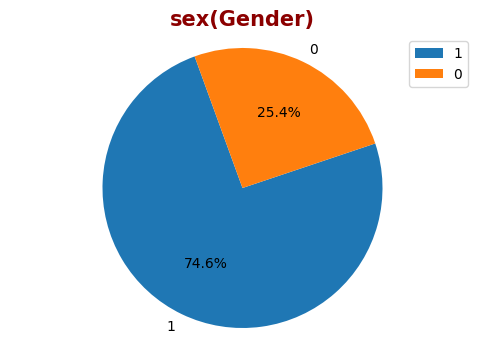

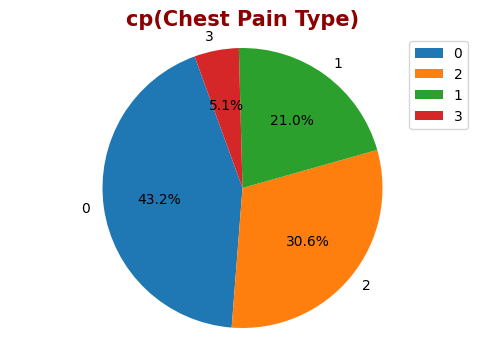

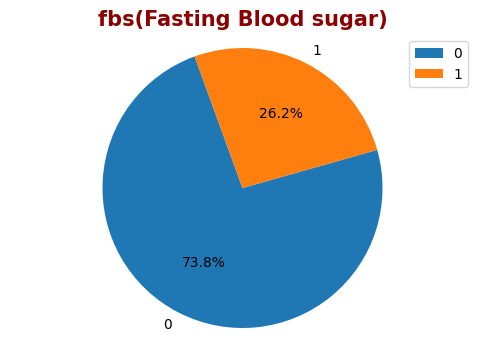

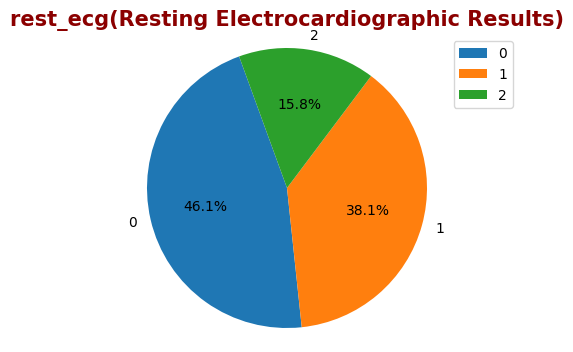

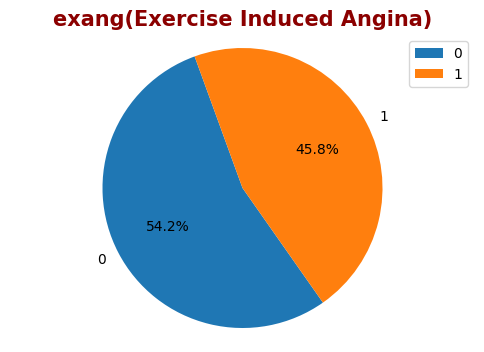

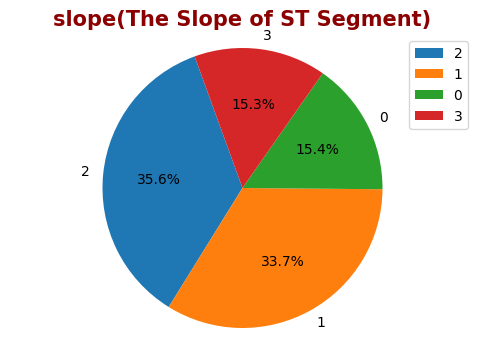

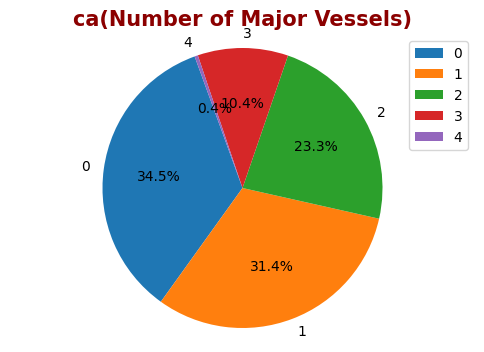

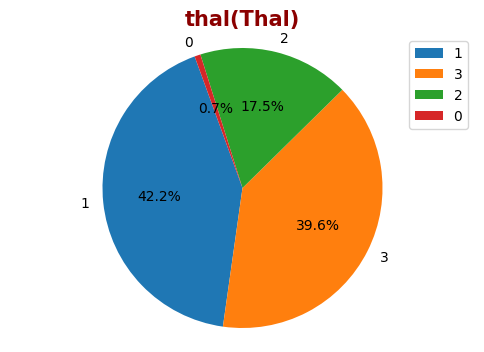

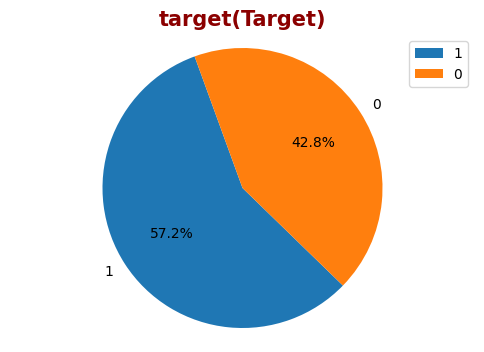

In [33]:
title_font={"color":"darkred","weight":"bold","size":15}
axis_font={"color":"darkblue","weight":"bold","size":13}

for i,z in list(zip(categoric_var,categoric_axis_name)):
  fig,ax=plt.subplots(figsize=(6,4))

  observation_values=list(df[i].value_counts().index)
  total_observation_values=list(df[i].value_counts())

  ax.pie(total_observation_values,labels=observation_values,autopct="%1.1f%%",startangle=110,labeldistance=1.1)
  ax.axis("equal")

  plt.title((i + "(" + z + ")"), fontdict=title_font)
  plt.legend()
  plt.show()



######**Examining the Missing Data According to the Analysis Result**

In [34]:
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
317,58,1,0,168,354,0,0,170,0,5.6,1,0,0,0
622,25,1,1,169,567,0,1,164,1,4.9,2,3,0,1
632,57,1,1,176,453,0,1,183,1,5.4,2,1,0,1
662,21,1,0,96,354,0,0,162,0,5.2,1,0,0,0
989,30,1,0,165,346,0,0,177,0,5.7,0,0,0,0
1037,76,1,0,130,334,0,0,98,1,2.3,0,0,0,0
1196,47,0,0,94,433,1,1,180,0,1.4,0,0,0,0


In [35]:
df["thal"]=df["thal"].replace(0,np.nan)

In [36]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [37]:
isnull_number=[]
for i in df.columns:
  x=df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [38]:
df["thal"].fillna(2,inplace=True)

In [39]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [40]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,48,1,2,139,349,0,2,183,1,5.6,2,2,3.0,1
1299,47,1,3,143,258,1,1,98,1,5.7,1,0,3.0,0
1300,69,1,0,156,434,1,0,196,0,1.4,3,1,3.0,1
1301,45,1,1,186,417,0,1,117,1,5.9,3,2,2.0,1


In [41]:
df["thal"]=pd.to_numeric(df["thal"],downcast="integer")

In [42]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [43]:
isnull_number=[]
for i in df.columns:
  x=df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [44]:
df["thal"].value_counts()

1    550
3    516
2    237
Name: thal, dtype: int64

#####**Bi-variate Analysis**

######**Numerical Variables - Target Variable(Analysis with FaceGrid)**

In [45]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [46]:
numeric_var.append("target")

In [47]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

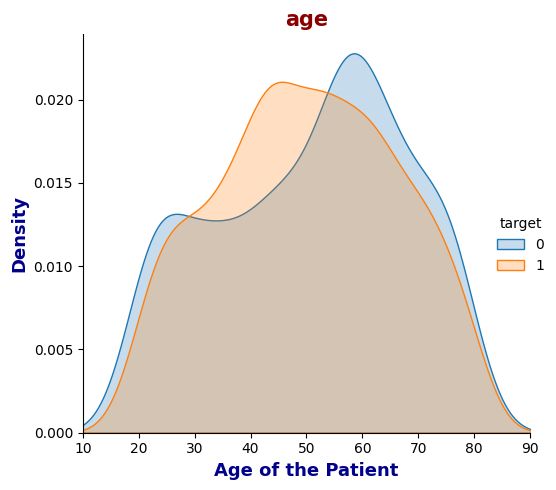

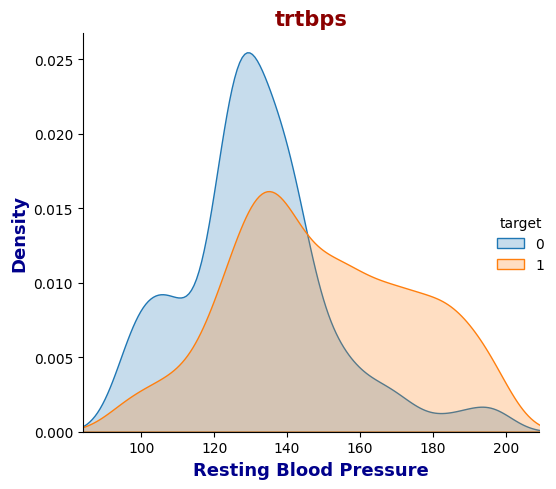

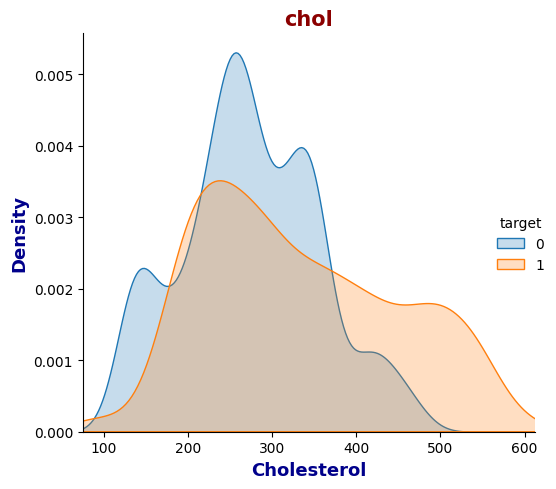

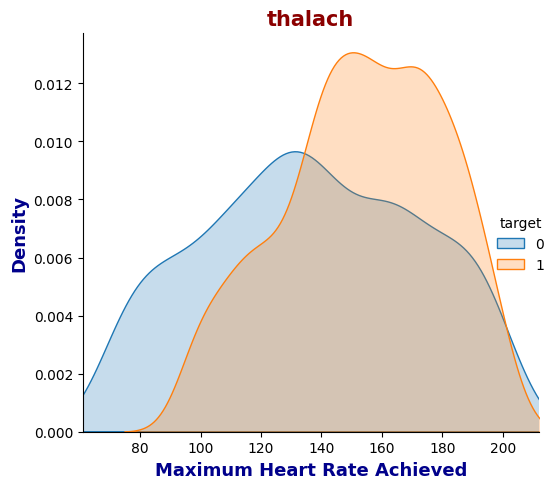

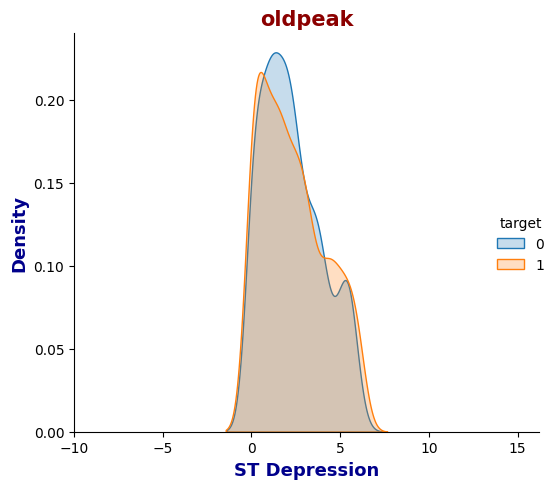

In [48]:
title_font={"color":"darkred","weight":"bold","size":15}
axis_font={"color":"darkblue","weight":"bold","size":13}

for i ,z in list(zip(numeric_var,numeric_axis_name)):
  graph=sns.FacetGrid(df[numeric_var],hue="target",height=5,xlim= ((df[i].min() -10),(df[i].max() +10)))
  graph.map(sns.kdeplot,i,shade=True)
  graph.add_legend()

  plt.title(i,fontdict=title_font)
  plt.xlabel(z,fontdict=axis_font)
  plt.ylabel("Density",fontdict=axis_font)

  plt.tight_layout()
  plt.show()

In [49]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,-0.018997,0.003790,-0.065276,-0.056532,-0.026223
trtbps,-0.018997,1.000000,0.252053,0.075104,0.126100,0.353513
chol,0.003790,0.252053,1.000000,0.055216,0.113578,0.278153
thalach,-0.065276,0.075104,0.055216,1.000000,-0.024087,0.255917
oldpeak,-0.056532,0.126100,0.113578,-0.024087,1.000000,0.019134
target,-0.026223,0.353513,0.278153,0.255917,0.019134,1.000000


In [50]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.026223
trtbps,0.353513
chol,0.278153
thalach,0.255917
oldpeak,0.019134
target,1.000000


######**Categorical Variables - Target Variable(Analysis with Count Plot)**

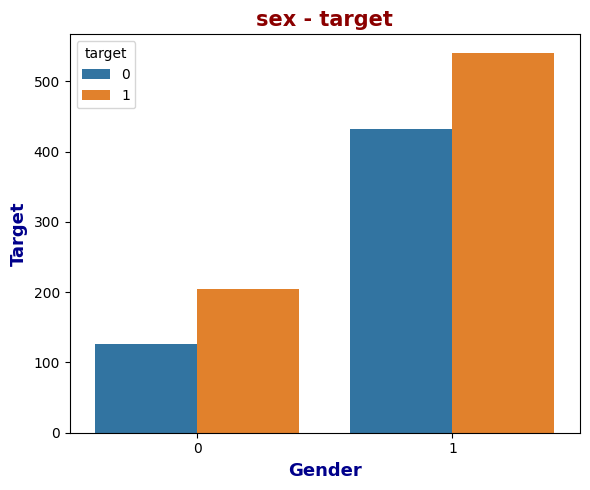

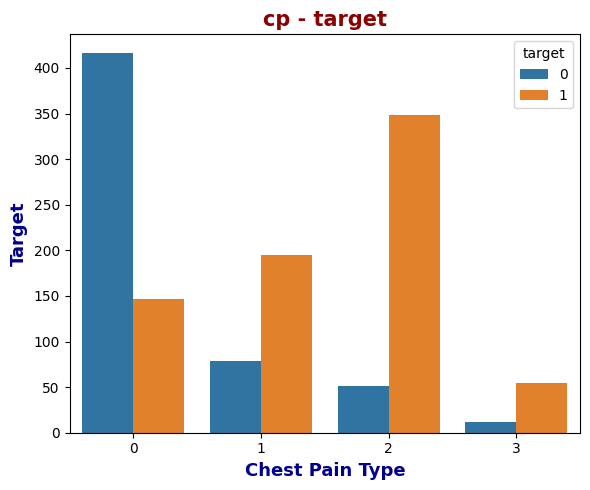

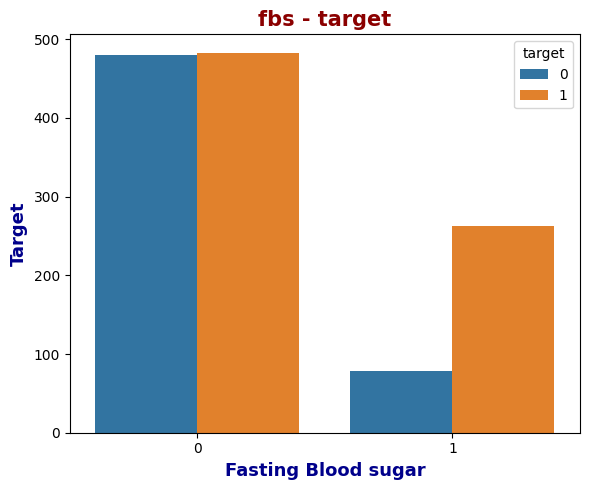

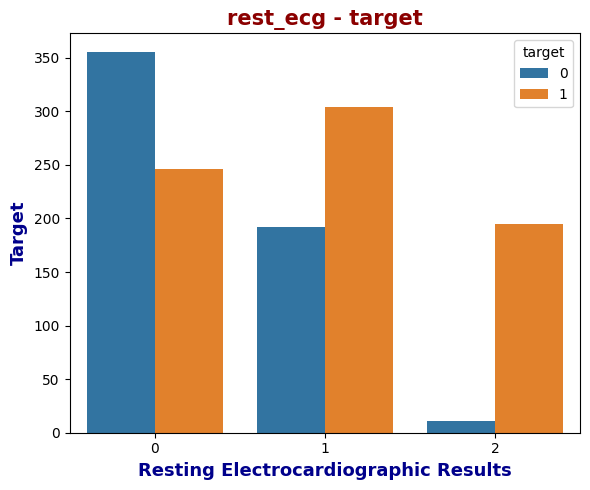

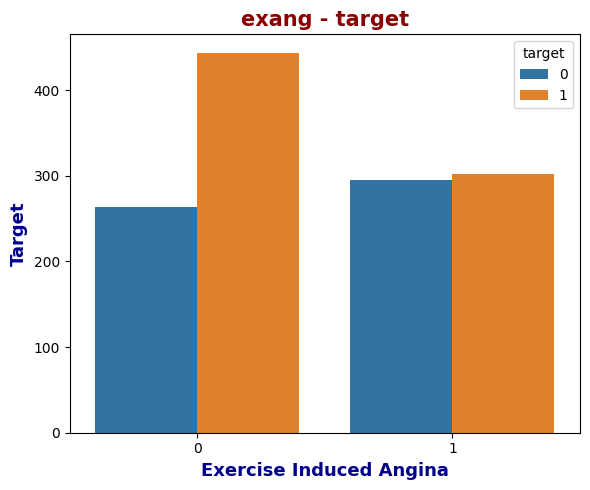

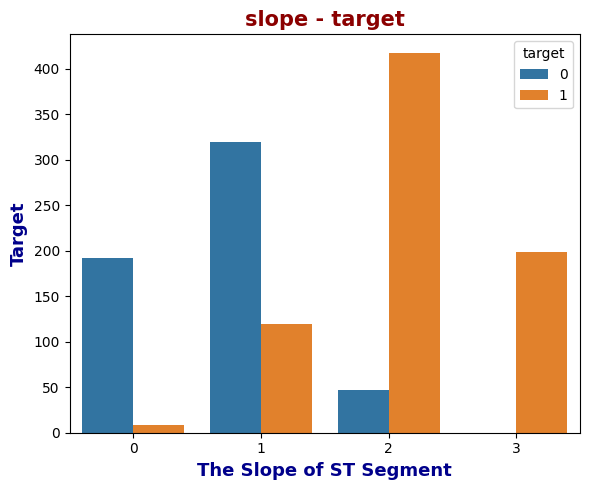

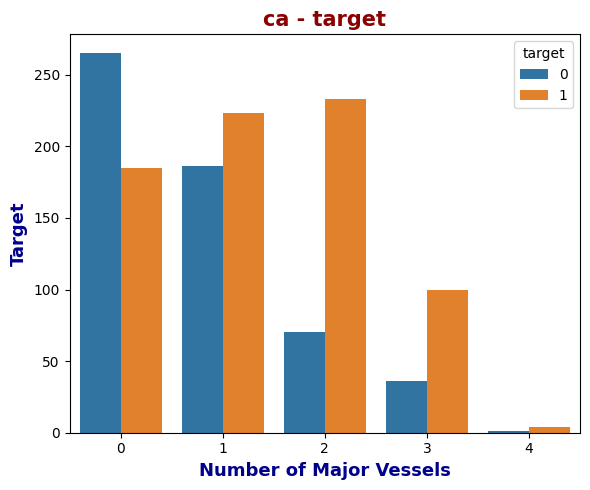

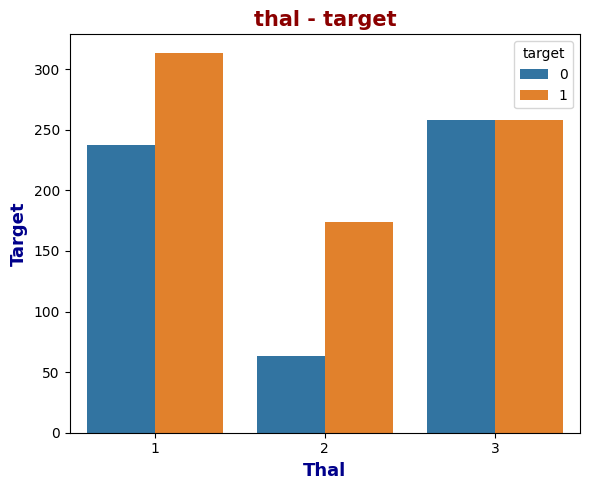

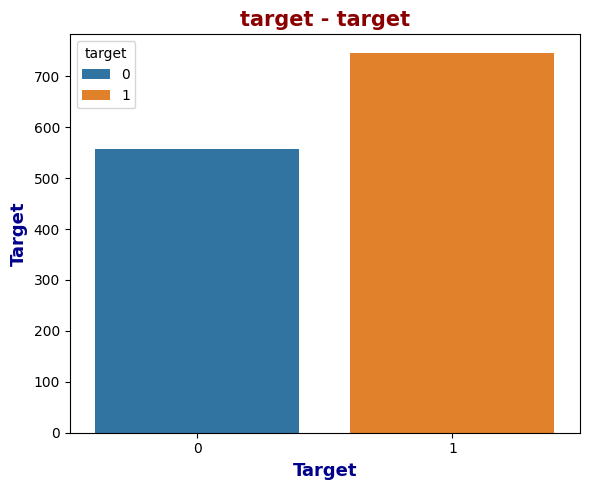

In [51]:
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (6, 5))
    sns.countplot(x=i, data = df[categoric_var], hue = "target")

    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [52]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,0.013394,0.038600,-0.037242,0.005858,-0.041894,0.067372,-0.040241,-0.056109
cp,0.013394,1.000000,0.201056,0.213136,-0.111411,0.403976,0.163814,-0.083706,0.523989
fbs,0.038600,0.201056,1.000000,0.128313,0.034211,0.210412,0.196130,-0.036888,0.240043
rest_ecg,-0.037242,0.213136,0.128313,1.000000,-0.019134,0.319909,0.175337,-0.043605,0.373395
exang,0.005858,-0.111411,0.034211,-0.019134,1.000000,-0.042843,0.042518,0.012910,-0.122457
slope,-0.041894,0.403976,0.210412,0.319909,-0.042843,1.000000,0.422997,-0.001600,0.714303
ca,0.067372,0.163814,0.196130,0.175337,0.042518,0.422997,1.000000,-0.049079,0.276573
thal,-0.040241,-0.083706,-0.036888,-0.043605,0.012910,-0.001600,-0.049079,1.000000,-0.061002
target,-0.056109,0.523989,0.240043,0.373395,-0.122457,0.714303,0.276573,-0.061002,1.000000


In [53]:
df[categoric_var].corr().iloc[:,[-1]]

,target
sex,-0.056109
cp,0.523989
fbs,0.240043
rest_ecg,0.373395
exang,-0.122457
slope,0.714303
ca,0.276573
thal,-0.061002
target,1.000000


######**Examining Numeric Variables Among Themselves(Analysis with Pair Plot)**

In [54]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [55]:
numeric_var.remove("target")

In [56]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


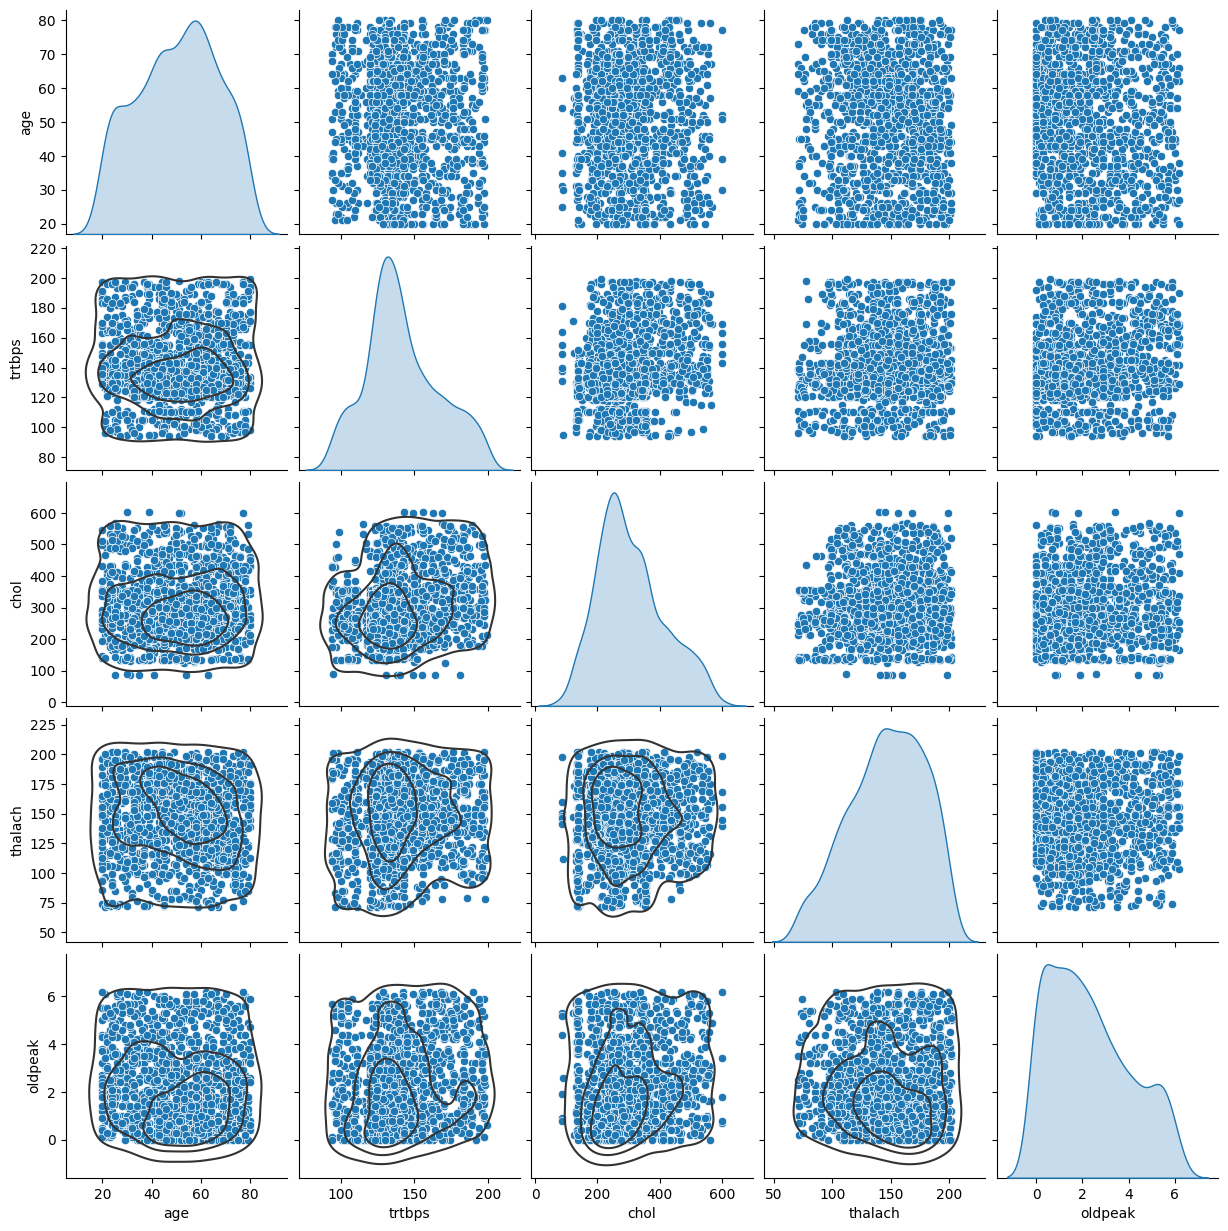

In [57]:
graph=sns.pairplot(df[numeric_var],diag_kind="kde")
graph.map_lower(sns.kdeplot,levels=4,color=".2")
plt.show()

####**Feature Scaling with the StandardScaler Method**

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
std_scaler=StandardScaler()

In [60]:
scaled_data=std_scaler.fit_transform(df[numeric_var])

In [61]:
scaled_data

array([[ 0.7669095 ,  0.12804328, -0.70175934,  0.11120781, -0.01128381],
       [-0.81983534, -0.47659693, -0.54267924,  1.26918615,  0.67256748],
       [-0.57572075, -0.47659693, -0.97313127,  0.79973547, -0.52417228],
       ...,
       [ 1.13308139,  0.57144609,  1.17912891,  1.55085655, -0.52417228],
       [-0.33160616,  1.78072651,  1.02004881, -0.92158368,  2.04027007],
       [-1.55217911,  0.65206479, -0.35552618, -0.10786917,  1.35641878]])

In [62]:
type(scaled_data)

numpy.ndarray

In [63]:
df_scaled=pd.DataFrame(scaled_data,columns=numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.766909,0.128043,-0.701759,0.111208,-0.011284
1,-0.819835,-0.476597,-0.542679,1.269186,0.672567
2,-0.575721,-0.476597,-0.973131,0.799735,-0.524172
3,0.339709,-0.879690,-0.673686,0.987516,-0.866098
4,0.400738,-0.879690,0.430517,0.518065,-0.980073


In [64]:
df_new=pd.concat([df_scaled,df.loc[:,"target"]],axis=1)

In [65]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.766909,0.128043,-0.701759,0.111208,-0.011284,1
1,-0.819835,-0.476597,-0.542679,1.269186,0.672567,1
2,-0.575721,-0.476597,-0.973131,0.799735,-0.524172,1
3,0.339709,-0.879690,-0.673686,0.987516,-0.866098,1
4,0.400738,-0.879690,0.430517,0.518065,-0.980073,1


In [66]:
melted_data=pd.melt(df_new,id_vars="target",var_name="variable",value_name="value")

In [67]:
melted_data

,target,variable,value
0,1,age,0.766909
1,1,age,-0.819835
2,1,age,-0.575721
3,1,age,0.339709
4,1,age,0.400738
...,...,...,...
6510,1,oldpeak,1.869307
6511,0,oldpeak,1.926295
6512,1,oldpeak,-0.524172
6513,1,oldpeak,2.040270


#####**Numerical Variables - Categorical Variables (Analysis with Box Plot)**

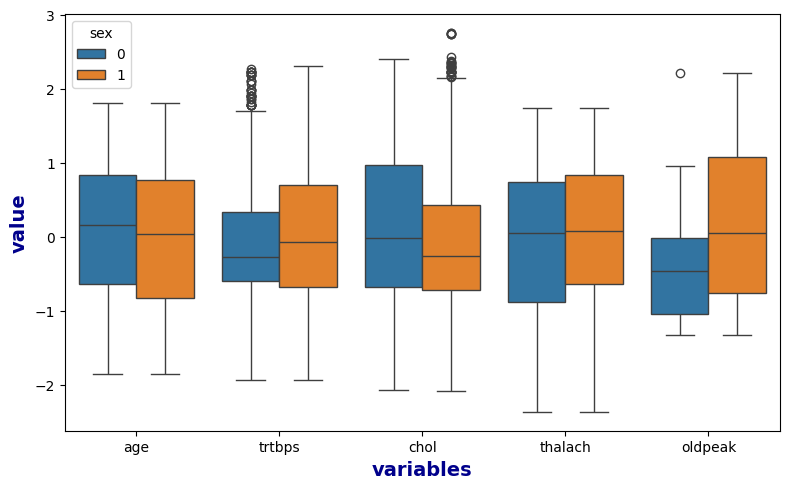

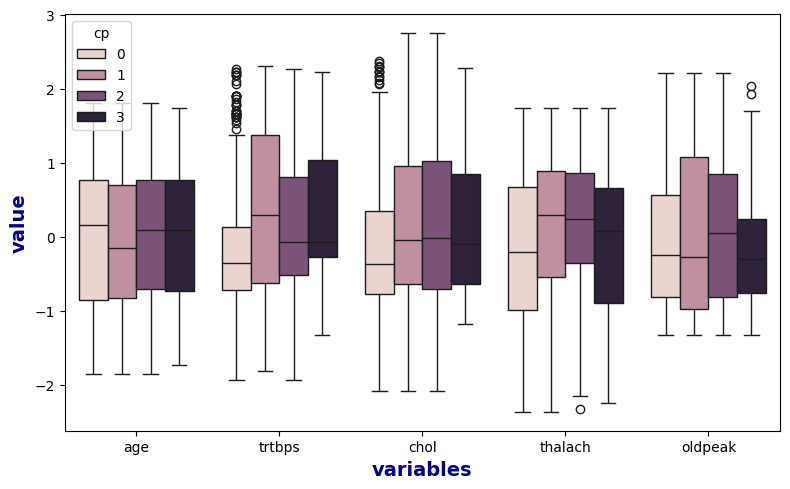

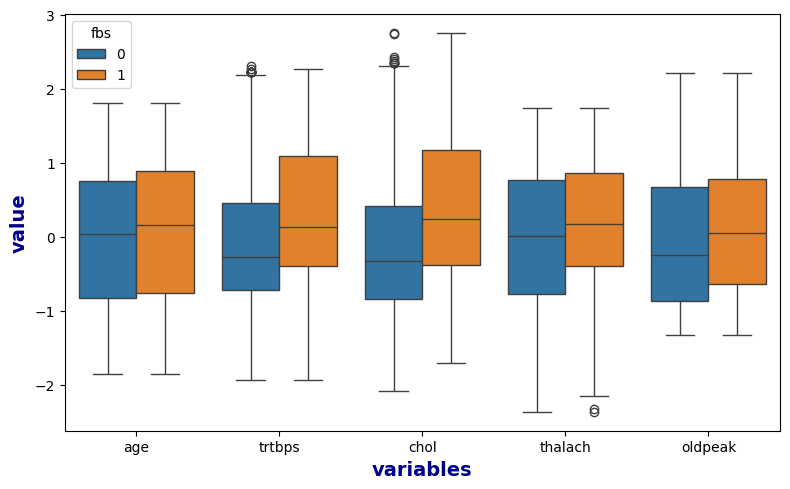

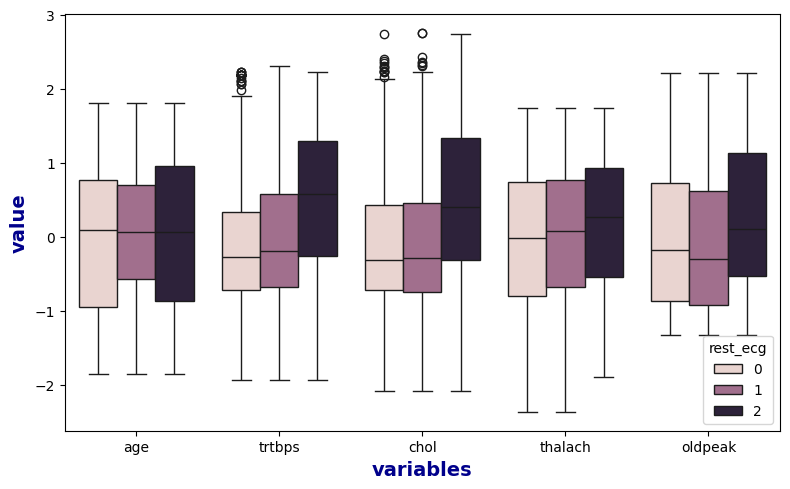

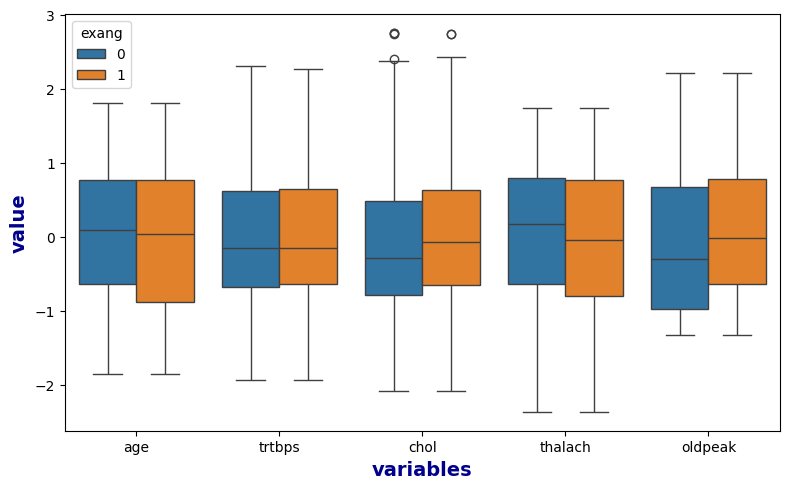

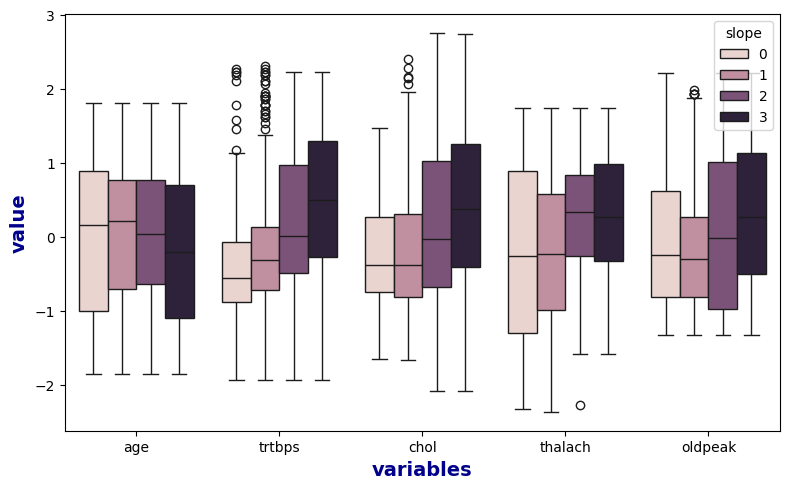

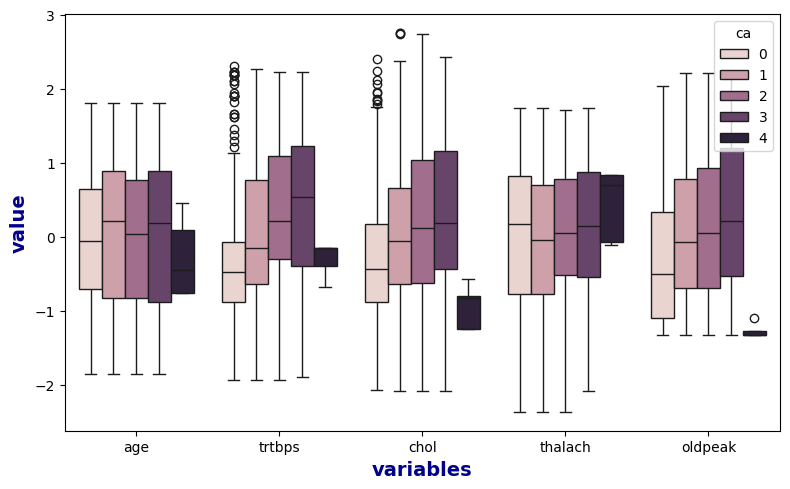

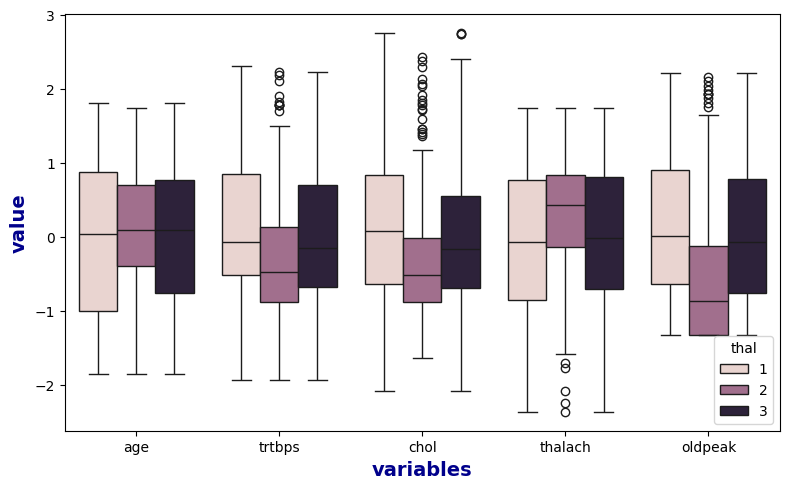

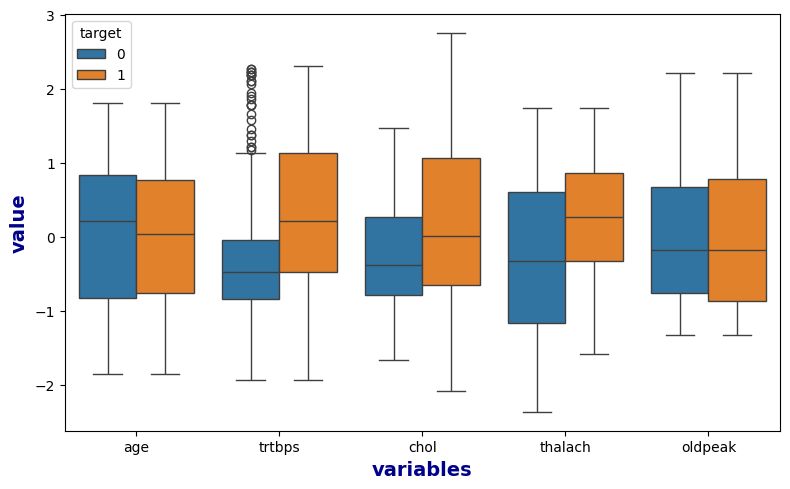

In [68]:
axis_font = { "color" : "darkblue", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
  df_new=pd.concat([df_scaled,df.loc[:,i]],axis=1)
  melted_data=pd.melt(df_new,id_vars=i,var_name="variables",value_name="value")

  plt.figure(figsize=(8,5))
  sns.boxplot(x="variables",y="value",hue=i,data=melted_data)

  plt.xlabel("variables",fontdict=axis_font)
  plt.ylabel("value",fontdict=axis_font)

  plt.tight_layout()
  plt.show()

#####**Relationships between variables(Analysis with Heatmap)**

In [69]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.766909,0.128043,-0.701759,0.111208,-0.011284
1,-0.819835,-0.476597,-0.542679,1.269186,0.672567
2,-0.575721,-0.476597,-0.973131,0.799735,-0.524172
3,0.339709,-0.879690,-0.673686,0.987516,-0.866098
4,0.400738,-0.879690,0.430517,0.518065,-0.980073
...,...,...,...,...,...
1298,-0.148520,-0.113813,0.383728,1.143999,1.869307
1299,-0.209549,0.047425,-0.467818,-1.516221,1.926295
1300,1.133081,0.571446,1.179129,1.550857,-0.524172
1301,-0.331606,1.780727,1.020049,-0.921584,2.040270


In [70]:
df_new2=pd.concat([df_scaled,df[categoric_var]],axis=1)

In [71]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.766909,0.128043,-0.701759,0.111208,-0.011284,1,3,1,0,0,0,0,1,1
1,-0.819835,-0.476597,-0.542679,1.269186,0.672567,1,2,0,1,0,0,0,2,1
2,-0.575721,-0.476597,-0.973131,0.799735,-0.524172,0,1,0,0,0,2,0,2,1
3,0.339709,-0.879690,-0.673686,0.987516,-0.866098,1,1,0,1,0,2,0,2,1
4,0.400738,-0.879690,0.430517,0.518065,-0.980073,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-0.148520,-0.113813,0.383728,1.143999,1.869307,1,2,0,2,1,2,2,3,1
1299,-0.209549,0.047425,-0.467818,-1.516221,1.926295,1,3,1,1,1,1,0,3,0
1300,1.133081,0.571446,1.179129,1.550857,-0.524172,1,0,1,0,0,3,1,3,1
1301,-0.331606,1.780727,1.020049,-0.921584,2.040270,1,1,0,1,1,3,2,2,1


In [72]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,-0.018997,0.003790,-0.065276,-0.056532,-0.044164,0.020832,0.037095,0.032328,-0.038999,-0.036666,0.029300,0.013456,-0.026223
trtbps,-0.018997,1.000000,0.252053,0.075104,0.126100,0.022142,0.165958,0.184758,0.218958,0.007847,0.321506,0.291707,-0.039041,0.353513
chol,0.003790,0.252053,1.000000,0.055216,0.113578,-0.106513,0.168746,0.247332,0.178096,0.071249,0.260591,0.229165,-0.041942,0.278153
thalach,-0.065276,0.075104,0.055216,1.000000,-0.024087,0.039442,0.144078,0.073314,0.085242,-0.054554,0.217606,0.050303,0.039535,0.255917
oldpeak,-0.056532,0.126100,0.113578,-0.024087,1.000000,0.290511,0.052724,0.069597,0.076975,0.097504,0.136463,0.180779,-0.035568,0.019134
sex,-0.044164,0.022142,-0.106513,0.039442,0.290511,1.000000,0.013394,0.038600,-0.037242,0.005858,-0.041894,0.067372,-0.040241,-0.056109
cp,0.020832,0.165958,0.168746,0.144078,0.052724,0.013394,1.000000,0.201056,0.213136,-0.111411,0.403976,0.163814,-0.083706,0.523989
fbs,0.037095,0.184758,0.247332,0.073314,0.069597,0.038600,0.201056,1.000000,0.128313,0.034211,0.210412,0.196130,-0.036888,0.240043
rest_ecg,0.032328,0.218958,0.178096,0.085242,0.076975,-0.037242,0.213136,0.128313,1.000000,-0.019134,0.319909,0.175337,-0.043605,0.373395
exang,-0.038999,0.007847,0.071249,-0.054554,0.097504,0.005858,-0.111411,0.034211,-0.019134,1.000000,-0.042843,0.042518,0.012910,-0.122457


<Axes: >

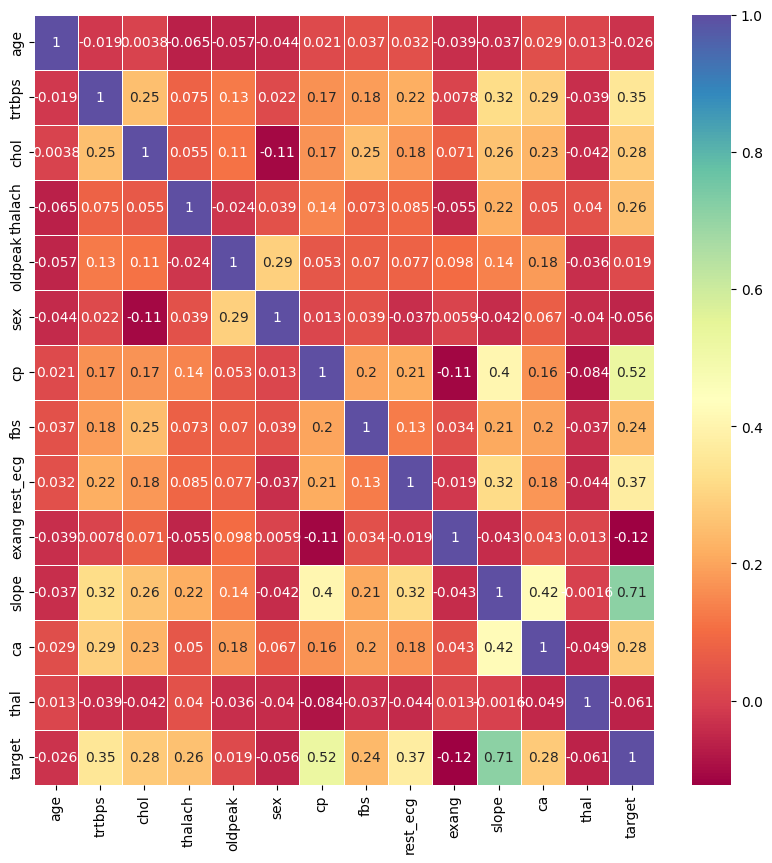

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_new2.corr(),cmap="Spectral",annot=True,linewidths=.5)

####**Preparation for Modeling**

#####**Dropping Columns with Low Correlation**

In [74]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
df.drop(["fbs","rest_ecg"],axis=1,inplace=True)

In [76]:
df.head()

,age,sex,cp,trtbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


#####**Struggling Outliers**

######**Visualizing outliers**

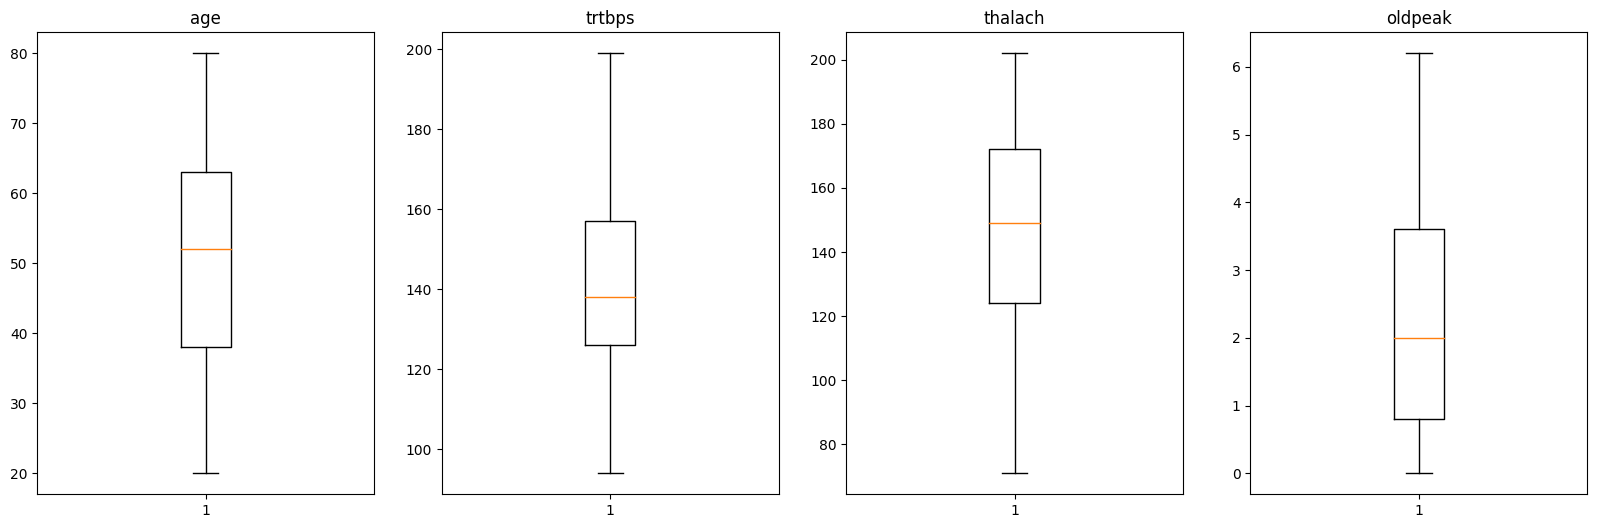

In [77]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#####**Dealing with outliers**

######Trtbps Variable

In [78]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [79]:
z_score_trtbps=zscore(df["trtbps"])
for threshold in range(1,4):
  print("Threshold Value : {}",format(threshold))
  print("Number of Outliers : {}",format(len(np.where(z_score_trtbps > threshold)[0])))
  print("--------------------")

Threshold Value : {} 1
Number of Outliers : {} 243
--------------------
Threshold Value : {} 2
Number of Outliers : {} 49
--------------------
Threshold Value : {} 3
Number of Outliers : {} 0
--------------------


In [80]:
df[z_score_trtbps >2][["trtbps"]]

,trtbps
323,196
364,196
431,197
467,194
549,196
554,196
567,197
593,197
625,194
645,197


In [81]:
df[z_score_trtbps >2].trtbps.min()

192

In [82]:
df[df["trtbps"]<170].trtbps.max()

169

In [83]:
winsorize_percentile_trtbps=(stats.percentileofscore(df["trtbps"],165))/100
print(winsorize_percentile_trtbps)

0.8027628549501151


In [84]:
1-winsorize_percentile_trtbps

0.19723714504988488

In [85]:
trtbps_winsorize=winsorize(df.trtbps,(0,(1-winsorize_percentile_trtbps)))

Text(0.5, 0, 'trtbps_winsorize')

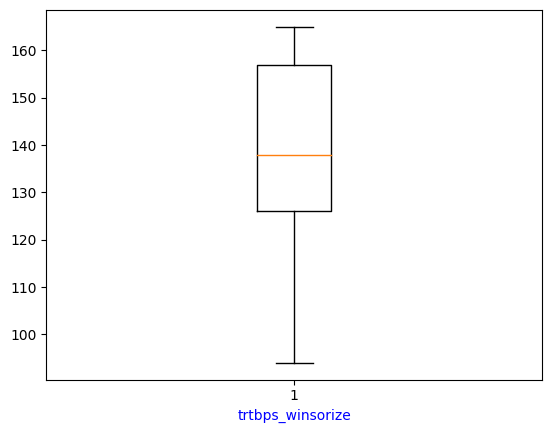

In [86]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize",color="b")

In [87]:
df["trtbps_winsorize"]=trtbps_winsorize

In [88]:
df.head()

,age,sex,cp,trtbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,233,150,0,2.3,0,0,1,1,145
1,37,1,2,130,250,187,0,3.5,0,0,2,1,130
2,41,0,1,130,204,172,0,1.4,2,0,2,1,130
3,56,1,1,120,236,178,0,0.8,2,0,2,1,120
4,57,0,0,120,354,163,1,0.6,2,0,2,1,120


######Thalach Variable

In [89]:
def iqr(df,var):
  q1=np.quantile(df[var],0.25)
  q3=np.quantile(df[var],0.75)
  diff=q3-q1
  lower_v=q1-(1.5*diff)
  upper_v=q3+(1.5*diff)
  return df[(df[var]< lower_v) | (df[var]>upper_v)]

In [90]:
thalach_out=iqr(df,"thalach")

In [91]:
thalach_out

,age,sex,cp,trtbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize


In [92]:
df.drop([272],axis=0,inplace=True)

In [93]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79600f51c610>,
 'caps': [<matplotlib.lines.Line2D at 0x79600f51cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x79600f51c370>],
 'medians': [<matplotlib.lines.Line2D at 0x79600f51d090>],
 'fliers': [<matplotlib.lines.Line2D at 0x79600f51d330>],
 'means': []}

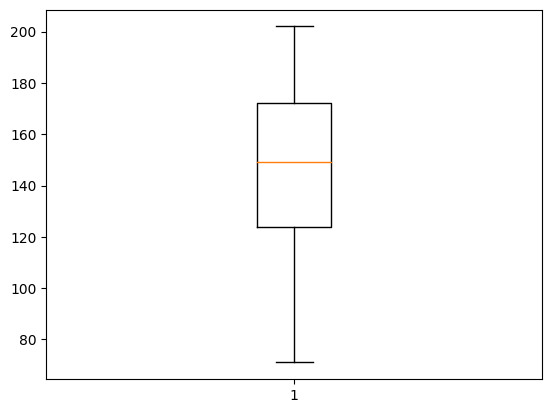

In [94]:
plt.boxplot(df["thalach"])

######Oldpeak Variable

In [95]:
def iqr(df,var):
  q1=np.quantile(df[var],0.25)
  q3=np.quantile(df[var],0.75)
  diff=q3-q1
  lower_v=q1-(1.5*diff)
  upper_v=q3+(1.5*diff)
  return df[(df[var]< lower_v) | (df[var]>upper_v)]

In [96]:
iqr(df,"oldpeak")

,age,sex,cp,trtbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize


In [97]:
df[df["oldpeak"]<4.2].oldpeak.max()

4.1

In [98]:
winsorize_percentile_oldpeak=stats.percentileofscore(df["oldpeak"],4)/100
print(winsorize_percentile_oldpeak)

0.7960829493087559


In [99]:
oldpeak_winsorize=winsorize(df.oldpeak,(0,(1-winsorize_percentile_oldpeak)))

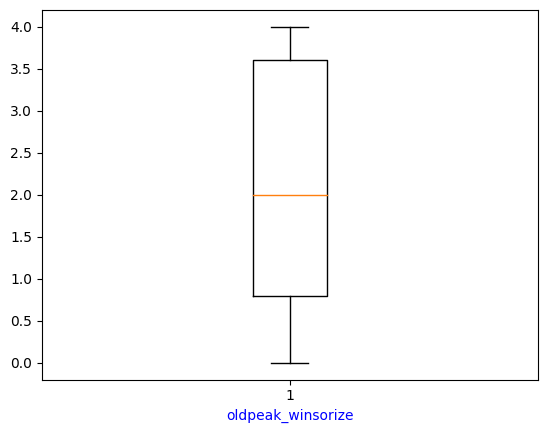

In [100]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize",color="b")
plt.show()

In [101]:
df["oldpeak_winsorize"]=oldpeak_winsorize

In [102]:
df.head()

,age,sex,cp,trtbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,233,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,250,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,204,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,236,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,354,163,1,0.6,2,0,2,1,120,0.6


######Determining Distributions of Numeric Variables

In [103]:
df.drop(["trtbps","oldpeak"],axis=1,inplace=True)

In [104]:
df.head()

,age,sex,cp,chol,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,233,150,0,0,0,1,1,145,2.3
1,37,1,2,250,187,0,0,0,2,1,130,3.5
2,41,0,1,204,172,0,2,0,2,1,130,1.4
3,56,1,1,236,178,0,2,0,2,1,120,0.8
4,57,0,0,354,163,1,2,0,2,1,120,0.6


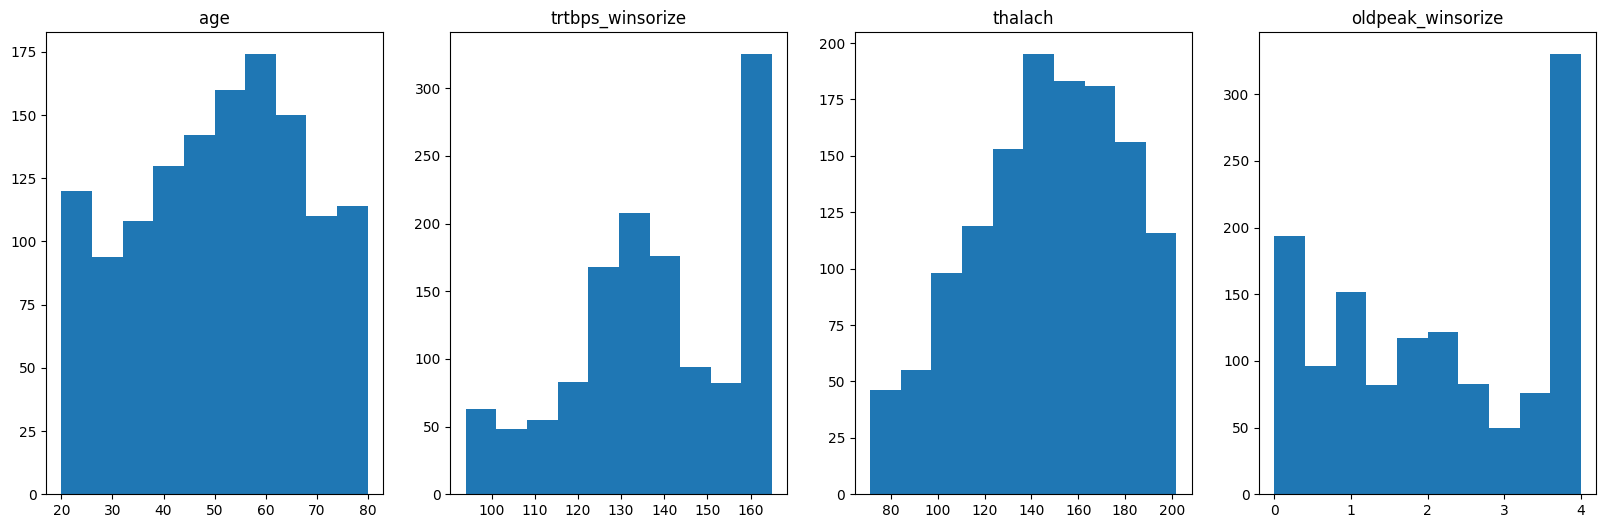

In [105]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [106]:
df[["age","trtbps_winsorize","thalach","oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.123110
trtbps_winsorize,-0.241954
thalach,-0.322583
oldpeak_winsorize,0.013695


####**Transformation Operations on Unsymmetrical Data**

In [107]:
df["oldpeak_winsorize_log"]=np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"]=np.sqrt(df["oldpeak_winsorize"])

In [108]:
df.head()

,age,sex,cp,chol,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,233,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,250,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,204,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,236,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,354,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [109]:
df[["oldpeak_winsorize","oldpeak_winsorize_log","oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.013695
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,-0.704785


In [110]:
df.drop(["oldpeak_winsorize","oldpeak_winsorize_log"],axis=1,inplace=True)

In [111]:
df.head()

,age,sex,cp,chol,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,233,150,0,0,0,1,1,145,1.516575
1,37,1,2,250,187,0,0,0,2,1,130,1.870829
2,41,0,1,204,172,0,2,0,2,1,130,1.183216
3,56,1,1,236,178,0,2,0,2,1,120,0.894427
4,57,0,0,354,163,1,2,0,2,1,120,0.774597


#####**Applying One Hot Encoding Method to Categorical Variables**

In [112]:
df_copy=df.copy()

In [113]:
df_copy.head()

,age,sex,cp,chol,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,233,150,0,0,0,1,1,145,1.516575
1,37,1,2,250,187,0,0,0,2,1,130,1.870829
2,41,0,1,204,172,0,2,0,2,1,130,1.183216
3,56,1,1,236,178,0,2,0,2,1,120,0.894427
4,57,0,0,354,163,1,2,0,2,1,120,0.774597


In [114]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [115]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [116]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [117]:
df_copy=pd.get_dummies(df_copy,columns=categoric_var[:-1],drop_first=True)

In [118]:
df_copy.head()

,age,chol,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,233,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,37,250,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,204,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56,236,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,57,354,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,0,1,0


#####**Feature Scaling with the StandardScaler Method for Machine Learning Algorithms**

In [119]:
new_numeric_var=["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]

In [120]:
std_scalar=StandardScaler()

In [121]:
df_copy[new_numeric_var]=std_scaler.fit_transform(df_copy[new_numeric_var])

In [122]:
df_copy.head()

,age,chol,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.767693,233,0.109587,1,0.317923,0.331817,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-0.819066,250,1.269607,1,-0.440294,0.900826,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.574949,204,0.799329,1,-0.440294,-0.203632,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0.340488,236,0.987440,1,-0.945771,-0.667490,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0.401518,354,0.517162,1,-0.945771,-0.859964,0,0,0,0,1,0,1,0,0,0,0,0,1,0


####**Separating Data into Test and Training Set**

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x=df_copy.drop(["target"],axis=1)
y=df_copy[["target"]]

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [126]:
x_train.head()

,age,chol,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
748,-1.307300,348,-0.830970,0.975044,-0.203632,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1096,-1.002154,248,-1.426656,-0.693032,0.900826,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1098,-0.635978,390,0.078235,-0.339198,1.108304,1,1,0,0,0,0,0,1,0,0,1,0,0,0
836,1.133868,200,-0.486099,0.317923,1.108304,1,0,0,1,0,0,0,1,0,0,1,0,0,0
550,0.096372,133,-1.677471,-1.400701,-1.088274,1,0,0,0,1,1,0,0,0,0,0,0,0,1


In [127]:
y_train.head()

,target
748,1
1096,0
1098,1
836,1
550,0


In [128]:
print(f"X_train:{x_train.shape[0]}")
print(f"X_test:{x_test.shape[0]}")
print(f"Y_train:{y_train.shape[0]}")
print(f"Y_test:{y_test.shape[0]}")

X_train:1041
X_test:261
Y_train:1041
Y_test:261


####**Modeling**

#####**Logistic Regression Algorithm**

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [131]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [132]:
y_pred_log=log_reg.predict(x_test)

In [133]:
y_pred_log

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [134]:
accuracy=accuracy_score(y_test,y_pred_log)
print("Test Accuracy:{}".format(accuracy))

Test Accuracy:0.8735632183908046


In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.87      0.91      0.89       147

    accuracy                           0.87       261
   macro avg       0.87      0.87      0.87       261
weighted avg       0.87      0.87      0.87       261



In [137]:
print(confusion_matrix(y_test,y_pred_log))

[[ 94  20]
 [ 13 134]]


######**Cross Validation**

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
scores=cross_val_score(log_reg,x_test,y_test,cv=10)

In [140]:
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.853988603988604


######**Roc Curve and Area Under Curve(AUC)**

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

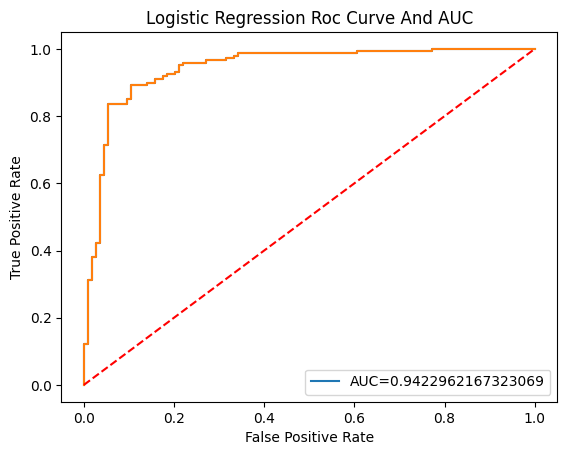

In [142]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Logistic Regression Roc Curve And AUC")
plt.legend(loc=4)
plt.show()

######**Hyperparameter Optimization(with GridSearchCV)**

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
log_reg_new=LogisticRegression()
log_reg_new

LogisticRegression()

In [145]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [146]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [147]:
log_reg_grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [148]:
print("Best parameters:",log_reg_grid.best_params_)

Best parameters: {'penalty': 'l2', 'solver': 'liblinear'}


In [149]:
log_reg_new2=LogisticRegression(penalty="l1",solver="saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [150]:
log_reg_new2.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [151]:
y_pred=log_reg_new2.predict(x_test)

In [152]:
print("The test accuracy score of Logistic Regression After hyper=parameter tuning is: {}".format(accuracy_score(y_test,y_pred)))

The test accuracy score of Logistic Regression After hyper=parameter tuning is: 0.6168582375478927


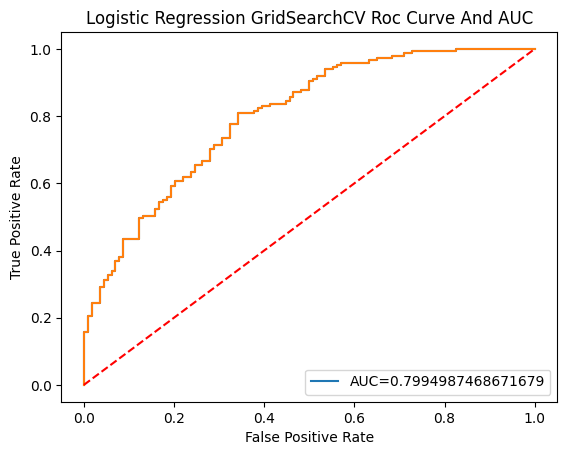

In [153]:
y_pred_proba = log_reg_new2.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.legend(loc=4)
plt.show()

#####**Decision Tree Algorithm**

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dec_tree=DecisionTreeClassifier(random_state=3)

In [156]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=3)

In [157]:
y_pred_dec=dec_tree.predict(x_test)

In [158]:
print("The test accuracy score of Decision Tree is:",accuracy_score(y_test,y_pred_dec))

The test accuracy score of Decision Tree is: 0.8582375478927203


In [159]:
scores=cross_val_score(dec_tree,x_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8005698005698006


In [160]:
print(classification_report(y_test,y_pred_dec))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.88      0.86      0.87       147

    accuracy                           0.86       261
   macro avg       0.86      0.86      0.86       261
weighted avg       0.86      0.86      0.86       261



In [161]:
print(confusion_matrix(y_test,y_pred_dec))

[[ 97  17]
 [ 20 127]]


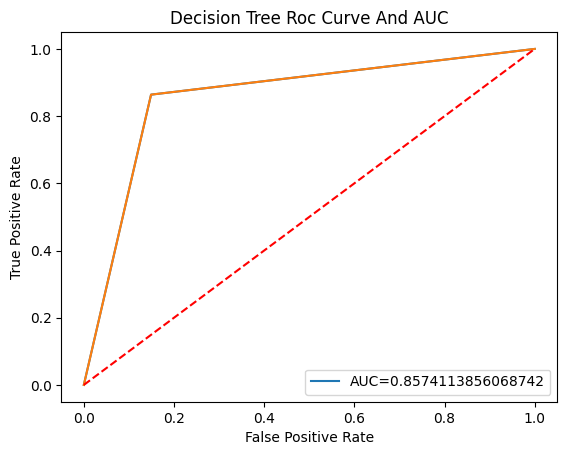

In [162]:
y_pred_proba = dec_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Decision Tree Roc Curve And AUC")
plt.legend(loc=4)
plt.show()

#####**Random Forest Algorithm**

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
random_forest=RandomForestClassifier(random_state=5)

In [165]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [166]:
y_pred_random=random_forest.predict(x_test)

In [167]:
print("The accuracy score of Random Forest is",accuracy_score(y_test,y_pred_random))

The accuracy score of Random Forest is 0.896551724137931


In [168]:
scores=cross_val_score(random_forest,x_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8887464387464388


In [169]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       114
           1       0.91      0.91      0.91       147

    accuracy                           0.90       261
   macro avg       0.90      0.89      0.89       261
weighted avg       0.90      0.90      0.90       261



In [170]:
print(confusion_matrix(y_test,y_pred_random))

[[100  14]
 [ 13 134]]


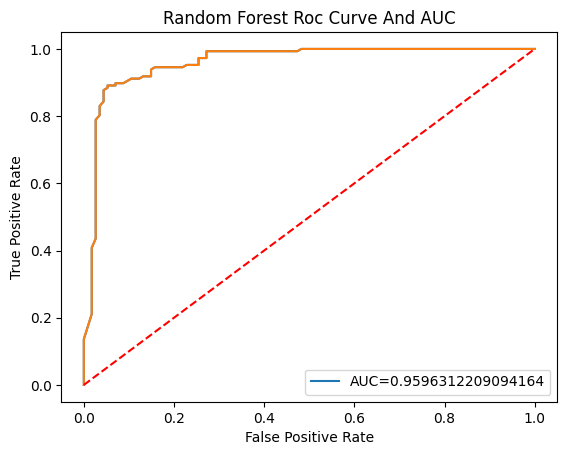

In [171]:
y_pred_proba = random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Random Forest Roc Curve And AUC")
plt.legend(loc=4)
plt.show()

######**Hyperparameter Optimization(with GridSearchCV)**

In [172]:
random_forest_new=RandomForestClassifier(random_state=5)
random_forest_new

RandomForestClassifier(random_state=5)

In [173]:
parameters = {"n_estimators" : [50, 100, 150, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}

In [174]:
random_forest_grid=GridSearchCV(random_forest_new,param_grid=parameters)

In [175]:
random_forest_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [176]:
print("Best Parameters:",random_forest_grid.best_params_)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [177]:
random_forest_new2=RandomForestClassifier(bootstrap=True,criterion="entropy",max_features="auto",n_estimators=200,random_state=5)

In [178]:
random_forest_new2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=200, random_state=5)

In [179]:
y_pred=random_forest_new2.predict(x_test)

In [180]:
print("The test accuracy scorre of Random Forest after hyper-parameter tuning is:",accuracy_score(y_test,y_pred))

The test accuracy scorre of Random Forest after hyper-parameter tuning is: 0.896551724137931


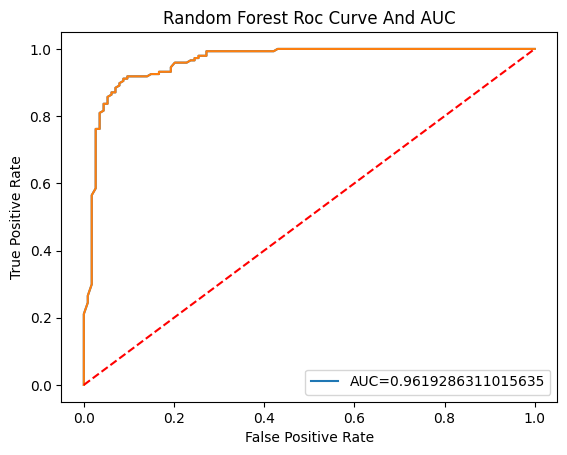

In [181]:
y_pred_proba = random_forest_new2.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Random Forest Roc Curve And AUC")
plt.legend(loc=4)
plt.show()

####**Compairing Models**

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [183]:
f1_score_log=f1_score(y_test, y_pred_log)
f1_score_log

0.8903654485049834

In [184]:
f1_score_dec=f1_score(y_test, y_pred_dec)
f1_score_dec

0.872852233676976

In [185]:
f1_score_random=f1_score(y_test, y_pred_random)
f1_score_random

0.9084745762711863

In [186]:
labels = ['Logistic Regression','Decision Tree','Random Forest']
f1_scores = [f1_score_log,f1_score_dec,f1_score_random]

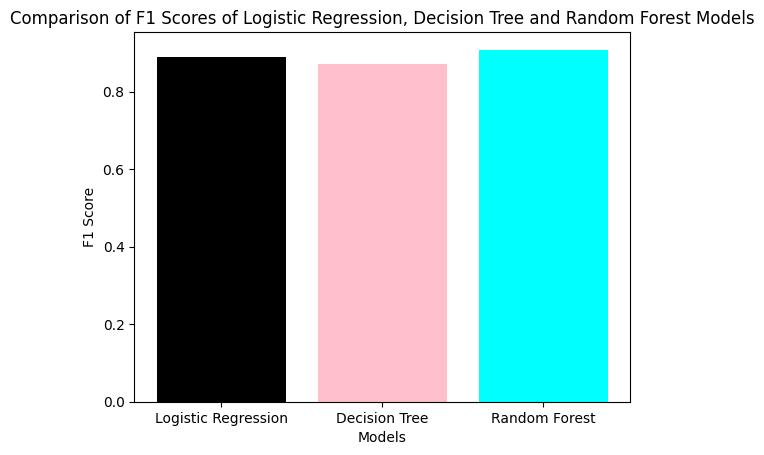

In [187]:
plt.bar(labels, f1_scores, color=['black', 'pink','cyan'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores of Logistic Regression, Decision Tree and Random Forest Models')
plt.show()

In [188]:
if (f1_score_log > f1_score_dec)and(f1_score_log > f1_score_random):
    print("Logistic Regression performs better according to f1_score.")
elif(f1_score_dec > f1_score_log)and(f1_score_dec > f1_score_random):
    print("Desicion Tree performs better according to f1_score.")
else:
    print("Random forest performs well.")

Random forest performs well.
